In [4]:
import pandas as pd
import pandas
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
import seaborn as sns

In [2]:
df=pd.read_excel("/Users/sunitjadeja/Desktop/TISS All Subject/Machine Learning/HousingData.xls")

In [3]:
test_size=0.33
seed= 7
train_data,test_data = train_test_split(df,test_size=test_size, random_state=seed)

In [4]:
y=train_data[["MEDV"]]
x=train_data[["RM"]]
X = np.c_[np.ones((339,1)),x]
Y=np.array(train_data['MEDV'])
X

array([[1.   , 6.345],
       [1.   , 6.98 ],
       [1.   , 5.935],
       [1.   , 5.998],
       [1.   , 6.471],
       [1.   , 6.151],
       [1.   , 8.297],
       [1.   , 6.482],
       [1.   , 5.787],
       [1.   , 5.565],
       [1.   , 6.842],
       [1.   , 3.561],
       [1.   , 6.951],
       [1.   , 7.416],
       [1.   , 6.826],
       [1.   , 5.186],
       [1.   , 5.834],
       [1.   , 8.375],
       [1.   , 7.923],
       [1.   , 5.786],
       [1.   , 6.015],
       [1.   , 5.85 ],
       [1.   , 4.519],
       [1.   , 4.368],
       [1.   , 6.144],
       [1.   , 5.572],
       [1.   , 6.245],
       [1.   , 6.758],
       [1.   , 6.167],
       [1.   , 5.807],
       [1.   , 8.259],
       [1.   , 5.935],
       [1.   , 4.973],
       [1.   , 6.405],
       [1.   , 7.007],
       [1.   , 6.202],
       [1.   , 6.174],
       [1.   , 6.604],
       [1.   , 6.405],
       [1.   , 7.333],
       [1.   , 5.859],
       [1.   , 5.875],
       [1.   , 6.108],
       [1. 

In [5]:
beta = 0.01 #Step size
iterations = 2000 #No. of iterations
m = y.size #No. of data points
np.random.seed(456) #Set the seed
#theta = np.random.rand(1,2) #Pick some random values to start with

In [6]:
alpha = 0.01 #Step size
iterations = 200 #No. of iterations
m = y.size #No. of data points
np.random.seed(456) #Set the seed
theta = np.random.rand(2) #Pick some random values to start with


#GRADIENT DESCENT
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = np.sum(np.square(error)/(2*len(y)))
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

In [7]:
past_thetas, past_costs = gradient_descent(X, Y, theta, iterations, alpha)
#parameter_values= pd.DataFrame(past_thetas)
cost_values= pd.DataFrame(past_costs)
alpha=past_thetas[-1]
past_costs.pop()


28.946715502871193

In [8]:
alpha.resize((2, 1))
alpha

array([[-0.21760213],
       [ 3.72439419]])

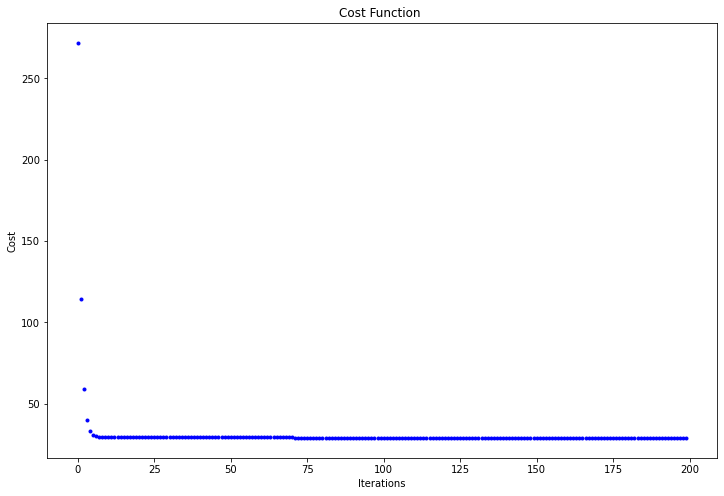

In [9]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')
plt.title('Cost Function ')
_=ax.plot(range(iterations),cost_values,'b.')

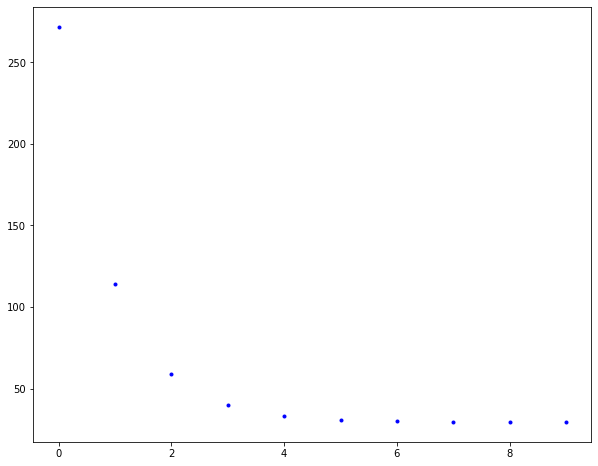

In [10]:
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(10),cost_values[:10],'b.')

In [11]:
y_t=test_data[["MEDV"]]
# x=train_data[["RM"]]
Y_t = np.c_[np.ones((167,1)),y_t]
# Y_t=np.array(train_data['MEDV'])

In [12]:
pred_t=np.dot(Y_t,alpha)

In [13]:
RSS=np.sum(np.square(Y_t - pred_t ))
TSS=np.sum(((Y_t)- (np.square(Y_t.mean()))))
Rsq = (1 - (RSS/TSS))
Rsq

49.26404758233035

In [14]:
pred=np.dot(X,alpha)

Text(0, 0.5, 'mpg')

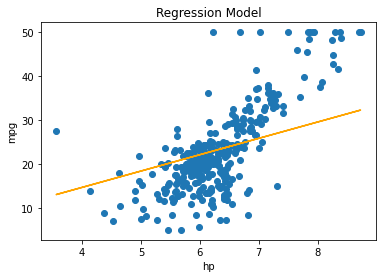

In [15]:
plt.scatter(x,y)
plt.plot(x,pred,color='orange')
plt.title("Regression Model")
plt.xlabel("hp")
plt.ylabel("mpg")